# Binary Label

In [7]:
import pandas as pd
df = pd.read_json("results_20_binary_take2.json")
df.head()

,fscore,recall,precision,overall_fscore,overall_recall,overall_precision,positive_annotated,negative_annotated
0,1.0,1.0,1.0,0.084821,0.0475,0.395833,1,0
1,1.0,1.0,1.0,0.559211,0.4250,0.817308,2,0
2,1.0,1.0,1.0,0.792261,0.9725,0.668385,2,1
3,1.0,1.0,1.0,0.792261,0.9725,0.668385,3,1
4,1.0,1.0,1.0,0.648508,0.6250,0.673854,3,2


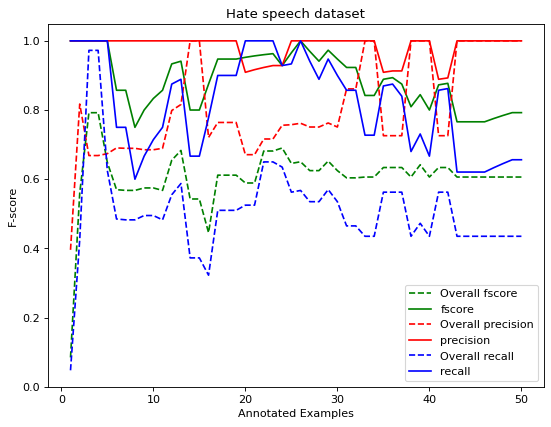

In [11]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.plot(df["positive_annotated"]+df["negative_annotated"], df["overall_fscore"],"g--", label="Overall fscore")

plt.plot(df["positive_annotated"]+df["negative_annotated"], df["fscore"], "g-",label="fscore")


plt.plot(df["positive_annotated"]+df["negative_annotated"], df["overall_precision"],"r--", label="Overall precision")

plt.plot(df["positive_annotated"]+df["negative_annotated"], df["precision"], "r-",label="precision")


plt.plot(df["positive_annotated"]+df["negative_annotated"], df["overall_recall"],"b--", label="Overall recall")

plt.plot(df["positive_annotated"]+df["negative_annotated"], df["recall"], "b-",label="recall")

plt.xlabel("Annotated Examples")
plt.ylabel("F-score")
plt.title("Hate speech dataset")
plt.legend()
plt.show()

# Multiclass Labels

In [1]:
import pandas as pd
df = pd.read_json("results_random_labeling_feature_selection_may24.json")
df = df.fillna(0)
df.tail(10)

,offensive_count,hate_count,none_count,offensive,hate,none
20,32,41,32,"{'fscore': 0.981818181818181, 'recall': 1.0, '...","{'fscore': 1.0, 'recall': 1.0, 'precision': 1....","{'fscore': 1.0, 'recall': 1.0, 'precision': 1...."
21,33,43,34,"{'fscore': 0.982456140350877, 'recall': 1.0, '...","{'fscore': 1.0, 'recall': 1.0, 'precision': 1....","{'fscore': 1.0, 'recall': 1.0, 'precision': 1...."
22,34,46,35,"{'fscore': 0.983050847457627, 'recall': 1.0, '...","{'fscore': 1.0, 'recall': 1.0, 'precision': 1....","{'fscore': 1.0, 'recall': 1.0, 'precision': 1...."
23,37,47,36,"{'fscore': 0.9846153846153841, 'recall': 1.0, ...","{'fscore': 1.0, 'recall': 1.0, 'precision': 1....","{'fscore': 1.0, 'recall': 1.0, 'precision': 1...."
24,38,49,38,"{'fscore': 0.9696969696969691, 'recall': 0.969...","{'fscore': 1.0, 'recall': 1.0, 'precision': 1....","{'fscore': 1.0, 'recall': 1.0, 'precision': 1...."
25,38,51,41,"{'fscore': 0.9705882352941171, 'recall': 1.0, ...","{'fscore': 1.0, 'recall': 1.0, 'precision': 1....","{'fscore': 1.0, 'recall': 1.0, 'precision': 1...."
26,40,52,43,"{'fscore': 0.985915492957746, 'recall': 1.0, '...","{'fscore': 1.0, 'recall': 1.0, 'precision': 1....","{'fscore': 1.0, 'recall': 1.0, 'precision': 1...."
27,40,54,46,"{'fscore': 0.957746478873239, 'recall': 0.9714...","{'fscore': 1.0, 'recall': 1.0, 'precision': 1....","{'fscore': 1.0, 'recall': 1.0, 'precision': 1...."
28,43,55,47,"{'fscore': 0.9870129870129861, 'recall': 1.0, ...","{'fscore': 1.0, 'recall': 1.0, 'precision': 1....","{'fscore': 1.0, 'recall': 1.0, 'precision': 1...."
29,44,58,48,"{'fscore': 0.9873417721518981, 'recall': 1.0, ...","{'fscore': 1.0, 'recall': 1.0, 'precision': 1....","{'fscore': 1.0, 'recall': 1.0, 'precision': 1...."


In [2]:
def get_stuff(x, name):
    if x==0:
        return 0.0
    else:
        try:
            return x[name]
        except:
            print(type(x))

In [3]:
# themes = ["price", "service", "environment"]
themes = ["offensive", "hate", "none"]
metrices = ["fscore", "recall", "precision"]
for theme in themes:
    for met in metrices:
        df[f"{theme}_{met}"] = df[f"{theme}"].apply(lambda x: get_stuff(x, f"{met}"))
        df[f"{theme}_overall_{met}"] = df[f"{theme}"].apply(lambda x: get_stuff(x, f"overall_{met}"))

In [4]:
df.tail(10)

,offensive_count,hate_count,none_count,offensive,hate,none,offensive_fscore,offensive_overall_fscore,offensive_recall,offensive_overall_recall,...,hate_recall,hate_overall_recall,hate_precision,hate_overall_precision,none_fscore,none_overall_fscore,none_recall,none_overall_recall,none_precision,none_overall_precision
20,32,41,32,"{'fscore': 0.981818181818181, 'recall': 1.0, '...","{'fscore': 1.0, 'recall': 1.0, 'precision': 1....","{'fscore': 1.0, 'recall': 1.0, 'precision': 1....",0.981818,0.384787,1.000000,0.430,...,1.0,0.265,1.0,0.319277,1.0,0.505226,1.0,0.725,1.0,0.387701
21,33,43,34,"{'fscore': 0.982456140350877, 'recall': 1.0, '...","{'fscore': 1.0, 'recall': 1.0, 'precision': 1....","{'fscore': 1.0, 'recall': 1.0, 'precision': 1....",0.982456,0.398058,1.000000,0.410,...,1.0,0.145,1.0,0.302083,1.0,0.505983,1.0,0.740,1.0,0.384416
22,34,46,35,"{'fscore': 0.983050847457627, 'recall': 1.0, '...","{'fscore': 1.0, 'recall': 1.0, 'precision': 1....","{'fscore': 1.0, 'recall': 1.0, 'precision': 1....",0.983051,0.470817,1.000000,0.605,...,1.0,0.135,1.0,0.306818,1.0,0.485370,1.0,0.705,1.0,0.370079
23,37,47,36,"{'fscore': 0.9846153846153841, 'recall': 1.0, ...","{'fscore': 1.0, 'recall': 1.0, 'precision': 1....","{'fscore': 1.0, 'recall': 1.0, 'precision': 1....",0.984615,0.393162,1.000000,0.460,...,1.0,0.190,1.0,0.316667,1.0,0.461240,1.0,0.595,1.0,0.376582
24,38,49,38,"{'fscore': 0.9696969696969691, 'recall': 0.969...","{'fscore': 1.0, 'recall': 1.0, 'precision': 1....","{'fscore': 1.0, 'recall': 1.0, 'precision': 1....",0.969697,0.576159,0.969697,0.870,...,1.0,0.100,1.0,0.281690,1.0,0.486583,1.0,0.680,1.0,0.378830
25,38,51,41,"{'fscore': 0.9705882352941171, 'recall': 1.0, ...","{'fscore': 1.0, 'recall': 1.0, 'precision': 1....","{'fscore': 1.0, 'recall': 1.0, 'precision': 1....",0.970588,0.598911,1.000000,0.825,...,1.0,0.140,1.0,0.318182,1.0,0.494662,1.0,0.695,1.0,0.383978
26,40,52,43,"{'fscore': 0.985915492957746, 'recall': 1.0, '...","{'fscore': 1.0, 'recall': 1.0, 'precision': 1....","{'fscore': 1.0, 'recall': 1.0, 'precision': 1....",0.985915,0.577778,1.000000,0.780,...,1.0,0.090,1.0,0.300000,1.0,0.508711,1.0,0.730,1.0,0.390374
27,40,54,46,"{'fscore': 0.957746478873239, 'recall': 0.9714...","{'fscore': 1.0, 'recall': 1.0, 'precision': 1....","{'fscore': 1.0, 'recall': 1.0, 'precision': 1....",0.957746,0.534615,0.971429,0.695,...,1.0,0.195,1.0,0.317073,1.0,0.505338,1.0,0.710,1.0,0.392265
28,43,55,47,"{'fscore': 0.9870129870129861, 'recall': 1.0, ...","{'fscore': 1.0, 'recall': 1.0, 'precision': 1....","{'fscore': 1.0, 'recall': 1.0, 'precision': 1....",0.987013,0.557659,1.000000,0.810,...,1.0,0.090,1.0,0.315789,1.0,0.517888,1.0,0.760,1.0,0.392765
29,44,58,48,"{'fscore': 0.9873417721518981, 'recall': 1.0, ...","{'fscore': 1.0, 'recall': 1.0, 'precision': 1....","{'fscore': 1.0, 'recall': 1.0, 'precision': 1....",0.987342,0.588679,1.000000,0.780,...,1.0,0.105,1.0,0.323077,1.0,0.520979,1.0,0.745,1.0,0.400538


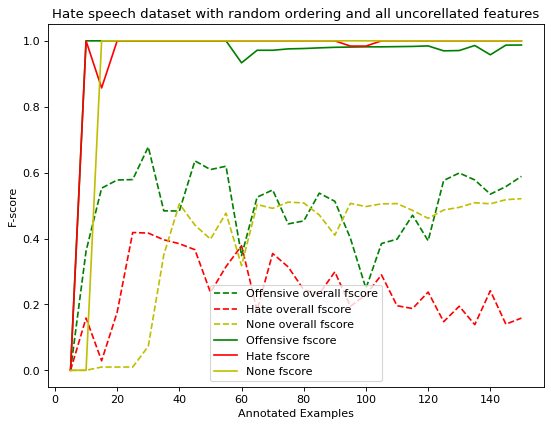

In [6]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
x = df["offensive_count"] + df["hate_count"] + df["none_count"]
plt.plot(x, df["offensive_overall_fscore"],"g--", label="Offensive overall fscore")

plt.plot(x, df["hate_overall_fscore"], "r--", label="Hate overall fscore")

plt.plot(x, df["none_overall_fscore"], "y--", label="None overall fscore")

plt.plot(x, df["offensive_fscore"], "g-",label="Offensive fscore")

plt.plot(x, df["hate_fscore"],"r-", label="Hate fscore")


plt.plot(x, df["none_fscore"], "y-", label="None fscore")

plt.xlabel("Annotated Examples")
plt.ylabel("F-score")
plt.title("Hate speech dataset with random ordering and all uncorellated features")
plt.legend()
plt.show()

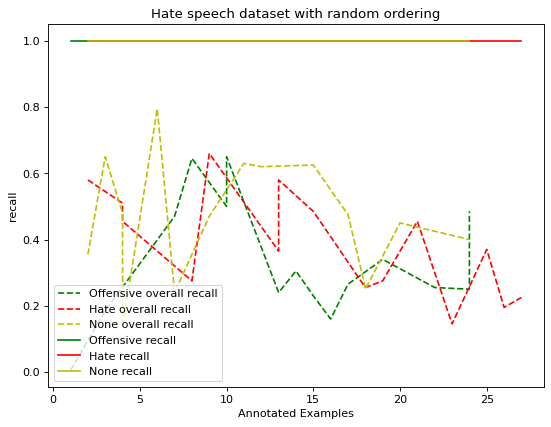

In [7]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)



plt.plot(df["offensive_count"], df["offensive_overall_recall"],"g--", label="Offensive overall recall")

plt.plot(df["hate_count"], df["hate_overall_recall"], "r--", label="Hate overall recall")

plt.plot(df["none_count"], df["none_overall_recall"], "y--", label="None overall recall")

plt.plot(df["offensive_count"], df["offensive_recall"], "g-",label="Offensive recall")

plt.plot(df["hate_count"], df["hate_recall"],"r-", label="Hate recall")


plt.plot(df["none_count"], df["none_recall"], "y-", label="None recall")

plt.xlabel("Annotated Examples")
plt.ylabel("recall")
plt.title("Hate speech dataset with random ordering")
plt.legend()
plt.show()

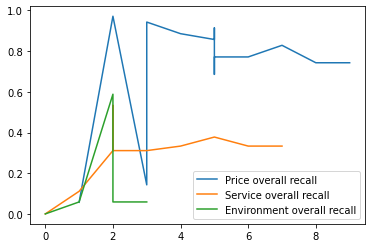

In [13]:
import matplotlib.pyplot as plt
plt.plot(df["price_count"], df["price_overall_recall"], label="Price overall recall")

plt.plot(df["service_count"], df["service_overall_recall"], label="Service overall recall")


plt.plot(df["environment_count"], df["environment_overall_recall"], label="Environment overall recall")

plt.legend()
plt.show()

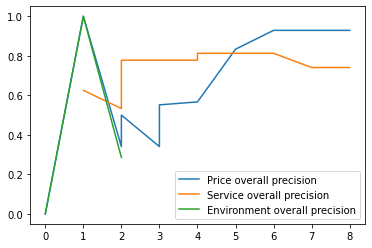

In [10]:
import matplotlib.pyplot as plt
plt.plot(df["price_count"], df["price_overall_precision"], label="Price overall precision")

plt.plot(df["service_count"], df["service_overall_precision"], label="Service overall precision")


plt.plot(df["environment_count"], df["environment_overall_precision"], label="Environment overall precision")

plt.legend()
plt.show()

# Random ordering in batches

In [7]:

import pandas as pd
df = pd.read_json("results_random_labeling_ordering.json")
df = df.fillna(0)
df.tail(10)

,offensive_count,hate_count,none_count,offensive,hate,none
20,32,41,32,"{'fscore': 0.981818181818181, 'recall': 1.0, '...","{'fscore': 1.0, 'recall': 1.0, 'precision': 1....","{'fscore': 1.0, 'recall': 1.0, 'precision': 1...."
21,33,43,34,"{'fscore': 0.982456140350877, 'recall': 1.0, '...","{'fscore': 1.0, 'recall': 1.0, 'precision': 1....","{'fscore': 1.0, 'recall': 1.0, 'precision': 1...."
22,34,46,35,"{'fscore': 0.983050847457627, 'recall': 1.0, '...","{'fscore': 1.0, 'recall': 1.0, 'precision': 1....","{'fscore': 1.0, 'recall': 1.0, 'precision': 1...."
23,37,47,36,"{'fscore': 0.9846153846153841, 'recall': 1.0, ...","{'fscore': 1.0, 'recall': 1.0, 'precision': 1....","{'fscore': 1.0, 'recall': 1.0, 'precision': 1...."
24,38,49,38,"{'fscore': 0.9696969696969691, 'recall': 0.969...","{'fscore': 1.0, 'recall': 1.0, 'precision': 1....","{'fscore': 1.0, 'recall': 1.0, 'precision': 1...."
25,38,51,41,"{'fscore': 0.9705882352941171, 'recall': 1.0, ...","{'fscore': 1.0, 'recall': 1.0, 'precision': 1....","{'fscore': 1.0, 'recall': 1.0, 'precision': 1...."
26,40,52,43,"{'fscore': 0.985915492957746, 'recall': 1.0, '...","{'fscore': 1.0, 'recall': 1.0, 'precision': 1....","{'fscore': 1.0, 'recall': 1.0, 'precision': 1...."
27,40,54,46,"{'fscore': 0.957746478873239, 'recall': 0.9714...","{'fscore': 1.0, 'recall': 1.0, 'precision': 1....","{'fscore': 1.0, 'recall': 1.0, 'precision': 1...."
28,43,55,47,"{'fscore': 0.9870129870129861, 'recall': 1.0, ...","{'fscore': 1.0, 'recall': 1.0, 'precision': 1....","{'fscore': 1.0, 'recall': 1.0, 'precision': 1...."
29,44,58,48,"{'fscore': 0.9873417721518981, 'recall': 1.0, ...","{'fscore': 1.0, 'recall': 1.0, 'precision': 1....","{'fscore': 1.0, 'recall': 1.0, 'precision': 1...."


In [8]:
# themes = ["price", "service", "environment"]
themes = ["offensive", "hate", "none"]
metrices = ["fscore", "recall", "precision"]
for theme in themes:
    for met in metrices:
        df[f"{theme}_{met}"] = df[f"{theme}"].apply(lambda x: get_stuff(x, f"{met}"))
        df[f"{theme}_overall_{met}"] = df[f"{theme}"].apply(lambda x: get_stuff(x, f"overall_{met}"))

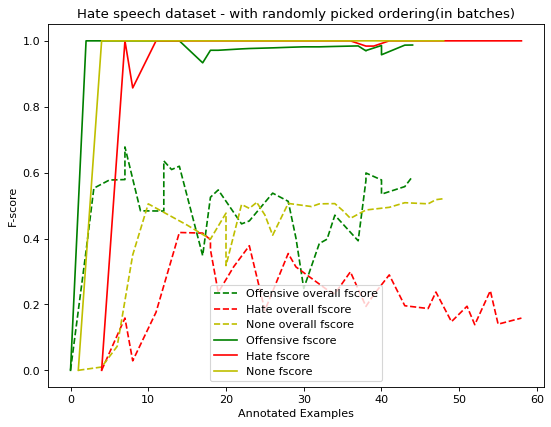

In [9]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.plot(df["offensive_count"], df["offensive_overall_fscore"],"g--", label="Offensive overall fscore")

plt.plot(df["hate_count"], df["hate_overall_fscore"], "r--", label="Hate overall fscore")

plt.plot(df["none_count"], df["none_overall_fscore"], "y--", label="None overall fscore")

plt.plot(df["offensive_count"], df["offensive_fscore"], "g-",label="Offensive fscore")

plt.plot(df["hate_count"], df["hate_fscore"],"r-", label="Hate fscore")


plt.plot(df["none_count"], df["none_fscore"], "y-", label="None fscore")

plt.xlabel("Annotated Examples")
plt.ylabel("F-score")
plt.title("Hate speech dataset - with randomly picked ordering(in batches)")
plt.legend()
plt.show()

# Model Picked ordering

In [9]:
import pandas as pd
df = pd.read_json("results_labeling_ordering.json")
df = df.fillna(0)
df.tail(10)

,offensive,hate,none,offensive_count,hate_count,none_count
10,"{'fscore': 0.7213114754098361, 'recall': 0.814...","{'fscore': 0.5714285714285711, 'recall': 0.457...","{'fscore': 0.7636363636363631, 'recall': 0.656...",43,60,52
11,"{'fscore': 0.7096774193548381, 'recall': 0.785...","{'fscore': 0.561403508771929, 'recall': 0.4444...","{'fscore': 0.566037735849056, 'recall': 0.4285...",44,68,58
12,"{'fscore': 0.7096774193548381, 'recall': 0.758...","{'fscore': 0.5666666666666661, 'recall': 0.447...","{'fscore': 0.581818181818181, 'recall': 0.4444...",46,77,62
13,"{'fscore': 0.7096774193548381, 'recall': 0.758...","{'fscore': 0.5666666666666661, 'recall': 0.447...","{'fscore': 0.581818181818181, 'recall': 0.4444...",52,84,64
14,"{'fscore': 0.7076923076923071, 'recall': 0.793...","{'fscore': 0.5666666666666661, 'recall': 0.447...","{'fscore': 0.581818181818181, 'recall': 0.4444...",58,91,66
15,"{'fscore': 0.7096774193548381, 'recall': 0.758...","{'fscore': 0.5666666666666661, 'recall': 0.447...","{'fscore': 0.581818181818181, 'recall': 0.4444...",62,100,68
16,"{'fscore': 0.7187500000000001, 'recall': 0.766...","{'fscore': 0.43999999999999906, 'recall': 0.28...","{'fscore': 0.5862068965517241, 'recall': 0.459...",69,106,70
17,"{'fscore': 0.7187500000000001, 'recall': 0.766...","{'fscore': 0.43999999999999906, 'recall': 0.28...","{'fscore': 0.5862068965517241, 'recall': 0.459...",73,111,76
18,"{'fscore': 0.7187500000000001, 'recall': 0.766...","{'fscore': 0.43999999999999906, 'recall': 0.28...","{'fscore': 0.5862068965517241, 'recall': 0.459...",77,116,82
19,"{'fscore': 0.7187500000000001, 'recall': 0.766...","{'fscore': 0.43999999999999906, 'recall': 0.28...","{'fscore': 0.5862068965517241, 'recall': 0.459...",81,121,88


In [10]:
# themes = ["price", "service", "environment"]
themes = ["offensive", "hate", "none"]
metrices = ["fscore", "recall", "precision"]
for theme in themes:
    for met in metrices:
        df[f"{theme}_{met}"] = df[f"{theme}"].apply(lambda x: get_stuff(x, f"{met}"))
        df[f"{theme}_overall_{met}"] = df[f"{theme}"].apply(lambda x: get_stuff(x, f"overall_{met}"))

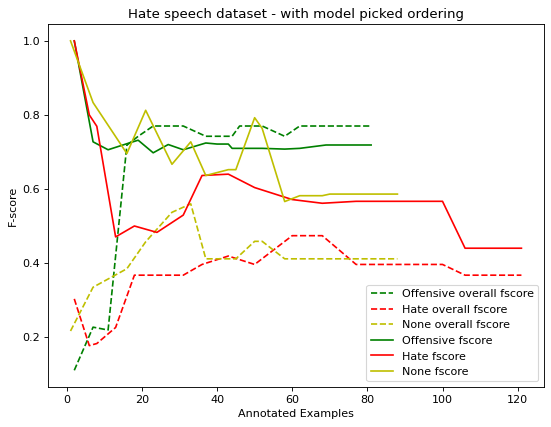

In [13]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.plot(df["offensive_count"], df["offensive_overall_fscore"],"g--", label="Offensive overall fscore")

plt.plot(df["hate_count"], df["hate_overall_fscore"], "r--", label="Hate overall fscore")

plt.plot(df["none_count"], df["none_overall_fscore"], "y--", label="None overall fscore")

plt.plot(df["offensive_count"], df["offensive_fscore"], "g-",label="Offensive fscore")

plt.plot(df["hate_count"], df["hate_fscore"],"r-", label="Hate fscore")


plt.plot(df["none_count"], df["none_fscore"], "y-", label="None fscore")

plt.xlabel("Annotated Examples")
plt.ylabel("F-score")
plt.title("Hate speech dataset - with model picked ordering")
plt.legend()
plt.show()

# New feature selection

In [2]:
def get_stuff(x, name):
    if x==0:
        return 0.0
    else:
        try:
            return x[name]
        except:
            print(type(x))

In [3]:

import pandas as pd
df = pd.read_json("../../results_collector/hatexplan_random_selection.json")
df = df.fillna(0)
df.tail(10)

,offensive,hatespeech,normal,offensive_count,hate_count,none_count,annotated
0,"{'fscore': 1.0, 'recall': 1.0, 'precision': 1....","{'fscore': 0.8989898989898991, 'recall': 0.9, ...","{'fscore': 1.0, 'recall': 1.0, 'precision': 1....",3,5,2,{'offensive': '{'1192167601658585089_twitter':...
1,"{'fscore': 0.852, 'recall': 0.85, 'precision':...","{'fscore': 0.895238095238095, 'recall': 0.9, '...","{'fscore': 0.832258064516129, 'recall': 0.85, ...",7,7,6,{'offensive': '{'1192167601658585089_twitter':...
2,"{'fscore': 0.75421796625627, 'recall': 0.76666...","{'fscore': 0.793650793650793, 'recall': 0.8, '...","{'fscore': 0.770186335403726, 'recall': 0.8, '...",10,10,10,{'offensive': '{'1192167601658585089_twitter':...
3,"{'fscore': 0.8600262666758831, 'recall': 0.864...","{'fscore': 0.761230195712954, 'recall': 0.7567...","{'fscore': 0.58000858000858, 'recall': 0.70270...",13,14,13,{'offensive': '{'1192167601658585089_twitter':...
4,"{'fscore': 0.8466189961603011, 'recall': 0.847...","{'fscore': 0.793756967670011, 'recall': 0.8043...","{'fscore': 0.777541299280429, 'recall': 0.7826...",17,17,16,{'offensive': '{'1192167601658585089_twitter':...
5,"{'fscore': 0.8527605657284171, 'recall': 0.862...","{'fscore': 0.7908622908622901, 'recall': 0.803...","{'fscore': 0.8068449197860961, 'recall': 0.823...",23,19,18,{'offensive': '{'1192167601658585089_twitter':...
6,"{'fscore': 0.814242204352826, 'recall': 0.8196...","{'fscore': 0.772331883573101, 'recall': 0.8032...","{'fscore': 0.768599608164905, 'recall': 0.7868...",28,19,23,{'offensive': '{'1192167601658585089_twitter':...
7,"{'fscore': 0.7878348522507591, 'recall': 0.802...","{'fscore': 0.6005541445393671, 'recall': 0.718...","{'fscore': 0.770052941764059, 'recall': 0.7746...",30,22,28,{'offensive': '{'1192167601658585089_twitter':...
8,"{'fscore': 0.712789073641188, 'recall': 0.7594...","{'fscore': 0.838060502038189, 'recall': 0.8481...","{'fscore': 0.5065238558909441, 'recall': 0.645...",32,27,31,{'offensive': '{'1192167601658585089_twitter':...
9,"{'fscore': 0.653820598006644, 'recall': 0.6976...","{'fscore': 0.78735370117039, 'recall': 0.81395...","{'fscore': 0.7187707641196011, 'recall': 0.720...",35,29,36,{'offensive': '{'1192167601658585089_twitter':...


In [4]:
# themes = ["price", "service", "environment"]
# themes = ["offensive", "hate", "none"]
themes = ["offensive", "hatespeech", "normal"]
metrices = ["fscore", "recall", "precision"]
broken = ["g--", "r--", "y--"]
solid = ["g-", "r-", "y-"]

for theme in themes:
    for met in metrices:
        df[f"{theme}_{met}"] = df[f"{theme}"].apply(lambda x: get_stuff(x, f"{met}"))
        df[f"{theme}_overall_{met}"] = df[f"{theme}"].apply(lambda x: get_stuff(x, f"overall_{met}"))

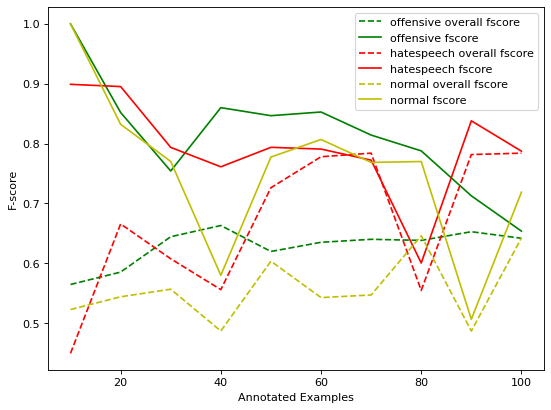

In [5]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
# x = df[f"{themes[0]}_count"] + df[f"{themes[1]}_count"] + df[f"{themes[2]}_count"]
x = df[f"{themes[0]}_count"] + df[f"hate_count"] + df[f"none_count"]

figure(figsize=(8, 6), dpi=80)
for i in range(len(themes)):
    plt.plot(x, df[f"{themes[i]}_overall_fscore"],f"{broken[i]}", label=f"{themes[i]} overall fscore")

    plt.plot(x, df[f"{themes[i]}_fscore"],f"{solid[i]}", label=f"{themes[i]} fscore")

plt.xlabel("Annotated Examples")
plt.ylabel("F-score")
# plt.title("Hate speech dataset - with model picked ordering")

plt.legend()
plt.show()


In [15]:
df.iloc[-1,:]["offensive"]["patterns"]

[{'pattern': '[retarded]|[bitch]',
  'precision': 0.6901319924575731,
  'recall': 0.6976744186046511,
  'fscore': 0.653820598006644}]

In [16]:
df.iloc[-1,:]['annotated']['offensive']

"{'1192167601658585089_twitter': i make shoe contact before i make eye contact, '1162735199513456640_twitter': sidra bfd slap urself u smelly bitch what the fuc bro why u likin my boyfriends picture for on instagram inni, '1196962774808707072_twitter': <user> i didnt lose my shit over <number> guards being arrested you bum fuck racoon retard you sure showed me, '1087133473318551555_twitter': <user> it ’ just the zoning that ’ retarded, '1081573659137830912_twitter': <user> best drama wanna defeat me bitches lovely bitches sorry but old kry cant come to the fucking phone right now, '27790684_gab': when you put it this way it sounds a bit retarded, '1178858512098713600_twitter': <user> <user> i always wondered why weidner acted like a faggot, '1123298276558532608_twitter': we have a retarded ape in the oval office, '1170552563726315520_twitter': dude i ’ ve been having no fun for the last like <number> months gaming without a headset is fucking retarded, '25950263_gab': the syrian muslim